# 1. Perkenalan

Nama: Affan, Aqsal, Lia Kurniawati, dan Yuana Inka

Batch: FTDS HCK-024

Objective: 

## Identifikasi Masalah

### Topik Permasalahan

"Analisis Prediksi Transaki Online dan Offline Fraud untuk Meningkatkan Keamananan Transaksi dan Menjaga Likuiditas Bank"

### Latar Belakang

Fungsi utama bank adalah menghimpun dana dari masyarakat dan menyalurkannya kembali dalam bentuk pinjaman atau kredit. Selain itu, bank juga memiliki tanggung jawab besar untuk menyediakan sistem transaksi keuangan yang aman dan terpercaya, sebagai penghimpun dan penyalur dana. Transaksi keuangan merupakan aspek penting dalam kegiatan ekonomi. Keamanan dan integritas bank sangat penting untuk memastikan transaksi keuangan berjalan dengan lancar dan terhindar dari potensi kerugian.

Dengan pesatnya perkembangan teknologi dalam beberapa tahun terakhir, bank dihadapkan pada tuntutan untuk menyediakan sistem transaksi yang cepat dan efisien, baik online maupun offline. Namun, seiring kemajuan teknologi, risiko fraud atau penipuan dalam transaksi keuangan juga semakin meningkat, sehingga bank harus memastikan bahwa setiap transaksi terlindungi dengan sistem yang kuat dan dapat diandalkan.

Untuk itu, penerapan teknologi seperti machine learning dan deep learning menjadi solusi efektif untuk mendeteksi pola transaksi mencurigakan secara otomatis dan real-time. Sistem ini dapat mengirimkan alarm kepada bank jika ada indikasi fraud, memungkinkan tindakan preventif diambil segera. Selain itu, teknologi ini mempercepat proses verifikasi, mengurangi ketergantungan pada pemeriksaan manual, dan meningkatkan efisiensi operasional.

Dengan mengimplementasikan teknologi keamanan canggih ini, bank tidak hanya bisa mengurangi kerugian akibat fraud, tetapi juga menjaga reputasi, meningkatkan kepercayaan nasabah, serta memenuhi harapan mereka terhadap sistem transaksi yang aman dan cepat. Sebagai hasilnya, bank dapat memastikan likuiditas dan profitabilitas tetap terjaga, sekaligus memperkuat posisi kompetitif di pasar yang semakin berbasis digital dan teknologi.

### Tujuan Analisis

Tujuan melakukan analisis atau model machine learning transaksi fraud:
1. Mendeteksi fraud sedini mungkin, mengidentikasi pola transaksi mencurigakan sehingga dapat meningkatkan keamanan transaksi nasabah serta menjaga kepercayaan nasabah
2. Menjaga kestabilan likuiditas bank.
3. Efisiensi bank terhadap deteksi fraud yang merugikan (eksternal maupun internal).


### Penjabaran Masalah


1. Jenis transaksi apa yang paling sering terjadi fraud?
2. Bagaimana hubungan saldo awal dan saldo akhir pengirim ketika transaksi fraud terjadi?
3. Bagaimana hubungan saldo Awal dan saldo akhir penerima ketika transaksi fraud terjadi?
4. Kapan step atau waktu paling sering terjadi fraud?


### Dataset Overview

Berikut adalah penjelasan untuk setiap kolom dalam dataset balance.csv:
1. step: Waktu transaksi dalam dataset ini menggunakan jam.
2. type: Jenis transaksi yang dilakukan dalam data set ini, CASH_OUT (penarikan uang), PAYMENT (pembayaran), TRANSFER(pemindahan dana), DEBIT (uang keluar melalui ATM), CASH_IN (uang masuk)
3. amount: Jumlah uang yang terlibat dalam transaksi.
4. nameOrig: ID unik dari akun asal yang melakukan transaksi.
5. oldbalanceOrg: Saldo akun asal sebelum transaksi dilakukan.
6. newbalanceOrig: Saldo akun asal setelah transaksi dilakukan.
7. nameDest: ID unik dari akun tujuan yang menerima transaksi.
8. oldbalanceDest: Saldo akun tujuan sebelum transaksi dilakukan.
9. newbalanceDest: Saldo akun tujuan setelah transaksi dilakukan.
10. isFraud: Indikator apakah transaksi tersebut adalah fraud (0) atau bukan (1).
11. isFlaggedFraud: Indikator apakah transaksi tersebut ditandai sebagai fraud oleh sistem (1) atau tidak (0) (potensi fraud).


# 2. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Mengimpor library yang akan digunakan untuk analisis seperti pandas, numpy, matplotlib, seaborn, sklearn, dan pickle yang akan membantu atau sebagai tools dalam analisis ini.

# 3. Data Loading

In [2]:
# meloading dan membaca data
data = pd.read_csv ('balance.csv')

Melakukan loading data yang akan digunakan yaitu dataset dengan nama balance.csv yang akan digunakan pada analisis kali ini yang telah diresample agar balancing pada tahap sebelumnya.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFlaggedFraud  16426 non-null  int64  
 10  isFraud         16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.4+ MB


Membaca data secara keseluruhan melalui data.info() pada dataset balance.csv, berdasarkan visualisasi terdapat 16426 baris dan 11 kolom, data lengkap tanpa ada yang hilang. 3 kolom int64, 3 kolom object dan 5 kolom float.

In [4]:
# melihat 10 data teratas
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,163,CASH_OUT,66061.94,C1444177449,0.00,0.00,C1433830539,153788.33,219850.28,0,0
1,378,PAYMENT,14598.76,C638641690,10779.00,0.00,M786508240,0.00,0.00,0,0
2,333,PAYMENT,10767.10,C1473859208,0.00,0.00,M204648638,0.00,0.00,0,0
3,307,PAYMENT,9342.70,C1660884816,180485.84,171143.14,M182225889,0.00,0.00,0,0
4,334,PAYMENT,6553.42,C843452443,20099.00,13545.58,M1268307159,0.00,0.00,0,0
5,163,CASH_OUT,101952.61,C1597425666,0.00,0.00,C998074550,453553.18,580728.12,0,0
6,185,PAYMENT,2121.14,C398705862,0.00,0.00,M1341333396,0.00,0.00,0,0
7,276,CASH_OUT,43535.69,C970635234,0.00,0.00,C1521571660,5058963.82,5102499.51,0,0
8,298,CASH_OUT,369057.41,C635396366,322030.95,0.00,C1827160321,664793.62,1033851.03,0,0
9,12,PAYMENT,21188.46,C266215176,143116.00,121927.54,M1138059665,0.00,0.00,0,0


Membaca dataset secara keseluruhan dan mulai memahami untuk tiap baris dan kolomnya, melihat fitur-fitur yang ada dan mulai membaca target yang akan dituju, agar lebih jelas melihat dari 10 baris pertama.

In [5]:
# melihat 10 data terbawah
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
16416,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,0,1
16417,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,0,1
16418,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,0,1
16419,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,0,1
16420,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,0,1
16421,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,0,1
16422,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,0,1
16423,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,0,1
16424,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,0,1
16425,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,0,1


Kemudian membaca dataset secara keseluruhan dan mulai memahami untuk tiap baris dan kolomnya, melihat fitur-fitur yang ada dan mulai lebih spesifik pada 10 baris terakhir.

In [6]:
# duplicate dataset

data_duplicate = data.copy()

Selanjutnya yang dilakukan adalah melakukan duplicate dataset tersebut agar data asli tetap terjaga atau terlindungi, sebelum melakukan perubahan atau pemodelan.

In [7]:
# mengecek data yang hilang
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64

Tidak terlihat missing value pada dataset, maka dataset lengkap tidak ada nilai yang hilang dan siap digunakan untuk analisis selanjutnya.

In [8]:
# mengecek data duplikat
data.duplicated().sum()

0

Tidak terdapat data duplikat dalam dataset, maka dataset siap untuk dianalisis lebih lanjut.

# 4. Exploratory Data Analysis (EDA)

Berdasarkan visualisasi diatas setelah dilakukan resample dataset, kita dapat melihat bahwa antara fitur dan target sudah seimbang. Hal ini membuat analisis kita lebih baik lagi karena tidak ada lagi data yang imbalance yang dapat menyebabkan analisis menjadi bias sehingga model tidak maksimal kinerjanya.

## 1. Jenis transaksi apa yang paling sering terjadi fraud?

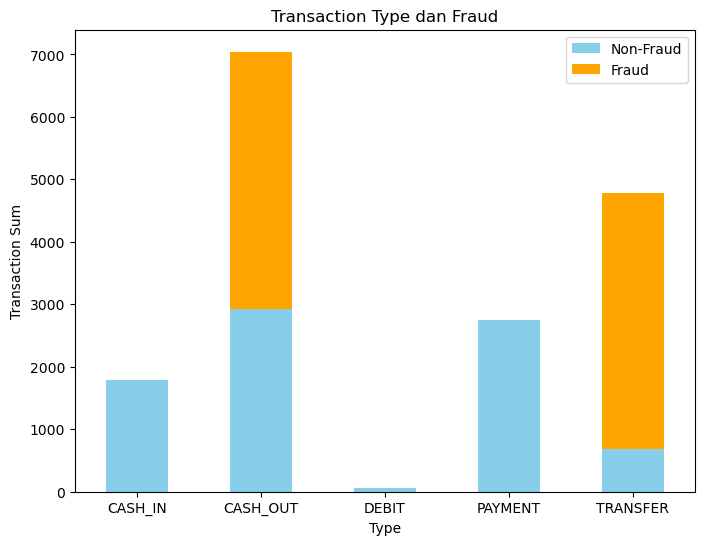

Fraud Transaction:
CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


In [9]:
# visualisasi dengan bar chart
type_fraud_counts = data.groupby(['type', 'isFraud']).size().unstack()
type_fraud_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(8, 6))
plt.title('Transaction Type dan Fraud')
plt.xlabel('Type')
plt.ylabel('Transaction Sum')
plt.legend(['Non-Fraud', 'Fraud'])
plt.xticks(rotation=0)
plt.show()

# menampilkan jumlah isFraud berdasarkan jenis transaksinya
fraud_by_type = data[data['isFraud'] == 1]
fraud_counts_by_type = fraud_by_type['type'].value_counts()
print("Fraud Transaction:")
print(fraud_counts_by_type)



Berdasarkan visualisasi diatas jenis transaksi yang sering terjadi fraud adalah transaksi cash_out dan transfer, hal ini berarti kita harus meningkatkan sistem deteksi fraud terutama ketika jumlah transfer atau cash_outnya besar. Kita perlu warning langsung dengan cara blokir atau menghubungi nasabah yang bersangkutan untuk dikonfirmasi lebih lanjut agar fraud bisa dicegah atau tidak terjadi.

## 2. Bagaimana perbandingan saldo awal dan saldo akhir pengirim ketika transaksi fraud dan tidak terjadi fraud?

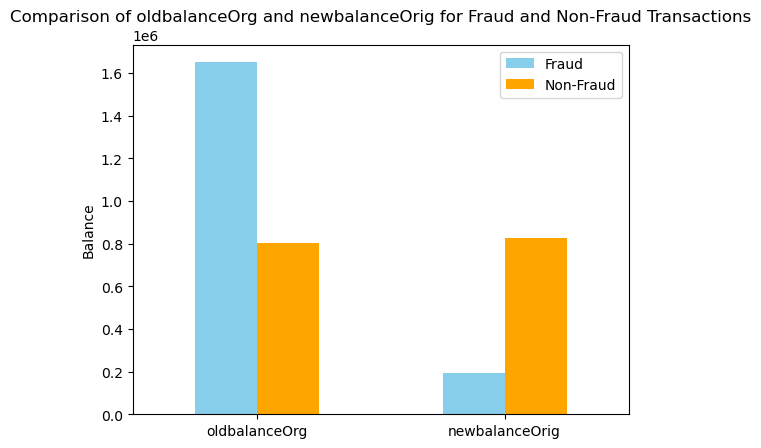

Mean of oldbalanceOrg and newbalanceOrig for Fraud Transactions:
oldbalanceOrg     1.649668e+06
newbalanceOrig    1.923926e+05
dtype: float64

Mean of oldbalanceOrg and newbalanceOrig for Non-Fraud Transactions:
oldbalanceOrg     804807.925249
newbalanceOrig    827527.695863
dtype: float64


In [10]:

# Membagi data menjadi transaksi fraud dan non-fraud
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]

# Menghitung rata-rata oldbalanceOrg dan newbalanceOrig untuk transaksi fraud
fraud_means = fraud_data[['oldbalanceOrg', 'newbalanceOrig']].mean()

# Menghitung rata-rata oldbalanceOrg dan newbalanceOrig untuk transaksi non-fraud
non_fraud_means = non_fraud_data[['oldbalanceOrg', 'newbalanceOrig']].mean()

# Menyiapkan data untuk visualisasi
means = pd.DataFrame({
    'Fraud': fraud_means,
    'Non-Fraud': non_fraud_means
})

# Visualisasi menggunakan bar chart
means.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Comparison of oldbalanceOrg and newbalanceOrig for Fraud and Non-Fraud Transactions')
plt.ylabel('Balance')
plt.xticks(rotation=0)
plt.show()

# Menampilkan hasil rata-rata untuk transaksi fraud dan non-fraud
print("Mean of oldbalanceOrg and newbalanceOrig for Fraud Transactions:")
print(fraud_means)

print("\nMean of oldbalanceOrg and newbalanceOrig for Non-Fraud Transactions:")
print(non_fraud_means)



Berdasarkan visualisasi diatas terlihat jelas bahwa ketika terjadi Fraud, saldo awal pengirim itu rata-rata jumlahnya banyak atau tinggi. Lalu setelah mereka melakukan transfer atau cash_out saldonya langsung menurun drastis atau biasanya langsung saldo minimum. Hal ini terjadi karena para tujuan pelaku fraud hanya ingin mengalirkan dananya saja atau lebih kita kenal dengan money laundry.

## 3. Bandingkan hubungan saldo awal dan saldo akhir penerima ketika transaksi fraud terjadi dan tidak terjadi fraud?

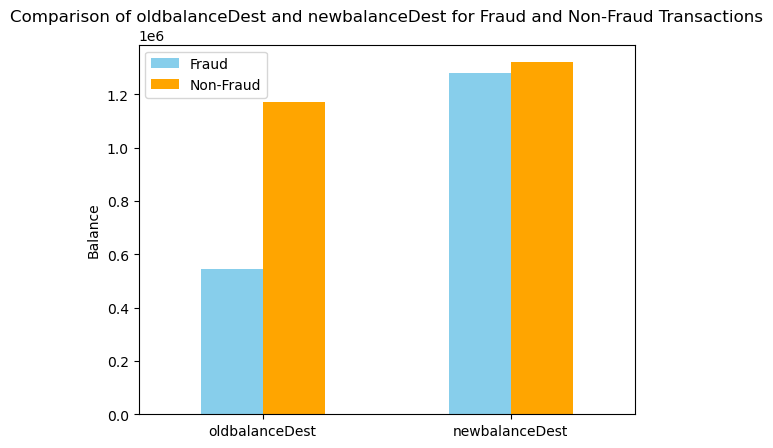

Mean of oldbalanceDest and newbalanceDest for Fraud Transactions:
oldbalanceDest    5.442496e+05
newbalanceDest    1.279708e+06
dtype: float64

Mean of oldbalanceDest and newbalanceDest for Non-Fraud Transactions:
oldbalanceDest    1.169733e+06
newbalanceDest    1.319778e+06
dtype: float64


In [16]:

# Membagi data menjadi transaksi fraud dan non-fraud
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]

# Menghitung rata-rata oldbalanceDest dan newbalanceDest untuk transaksi fraud
fraud_dest_means = fraud_data[['oldbalanceDest', 'newbalanceDest']].mean()

# Menghitung rata-rata oldbalanceDest dan newbalanceDest untuk transaksi non-fraud
non_fraud_dest_means = non_fraud_data[['oldbalanceDest', 'newbalanceDest']].mean()

# Menyiapkan data untuk visualisasi
means = pd.DataFrame({
    'Fraud': fraud_dest_means,
    'Non-Fraud': non_fraud_dest_means
})

# Visualisasi menggunakan bar chart
means.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Comparison of oldbalanceDest and newbalanceDest for Fraud and Non-Fraud Transactions')
plt.ylabel('Balance')
plt.xticks(rotation=0)
plt.show()

# Menampilkan hasil rata-rata untuk transaksi fraud dan non-fraud pada penerima
print("Mean of oldbalanceDest and newbalanceDest for Fraud Transactions:")
print(fraud_dest_means)

print("\nMean of oldbalanceDest and newbalanceDest for Non-Fraud Transactions:")
print(non_fraud_dest_means)



Berdasarkan visualisasi diatas terlihat jelas bahwa ketika terjadi Fraud, saldo awal penerima itu rata-rata jumlahnya sedikit atau tidak banyak. Lalu setelah mereka melakukan menerima transfer atau uang masuk saldonya langsung meningkat drastis atau sangat tinggi diatas rata-rata saldo mereka pada umumnya. Hal ini terjadi karena tujuan pelaku fraud yaitu mengalirkan dana ke rekening-rekening baru atau rekening orang-orang yang mereka bayar biasanya terjadi praktik jual beli rekening. Biasanya uang tidak akan tinggal lama, akan ditransfer kembali atau dicashout.

## 4. Kapan step atau waktu paling sering terjadi fraud?

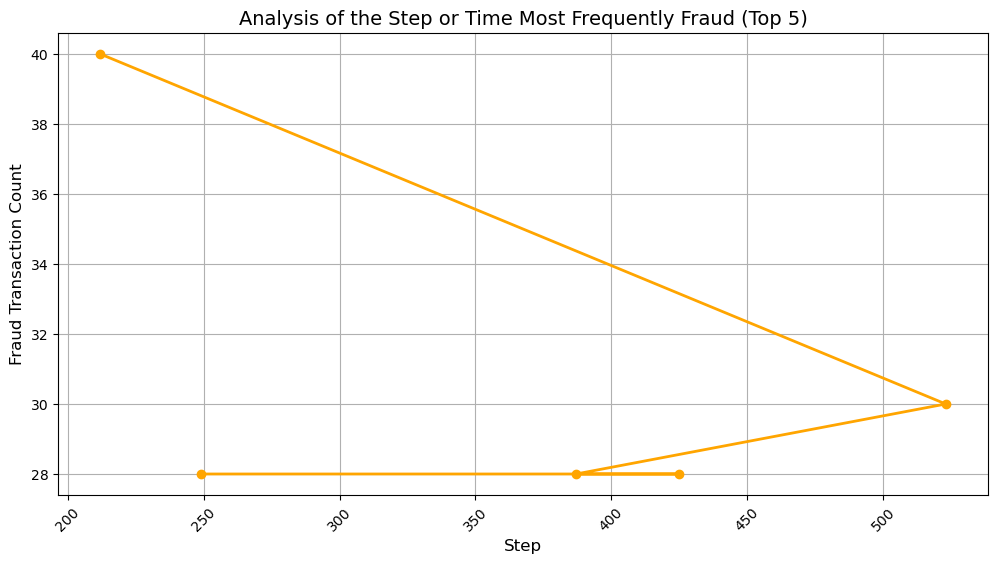

Fraud Transaction Step Frequency:
212    40
523    30
387    28
425    28
249    28
       ..
202     2
589     2
112     2
548     2
662     2
Name: step, Length: 741, dtype: int64


In [20]:
import matplotlib.pyplot as plt

# Memisahkan data transaksi fraud
fraud_data = data[data['isFraud'] == 1]

# Menghitung frekuensi fraud berdasarkan step
step_fraud = fraud_data['step'].value_counts()

# Mengambil 50 step teratas yang paling sering terjadi fraud
top_50 = step_fraud.head(5)

# Visualisasi menggunakan line chart
plt.figure(figsize=(12, 6))
top_50.plot(kind='line', marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Analysis of the Step or Time Most Frequently Fraud (Top 5)', fontsize=14)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Fraud Transaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Menampilkan hasil frekuensi transaksi fraud berdasarkan step
print("Fraud Transaction Step Frequency:")
print(step_fraud)


Berdasarkan visualisasi diatas kita mencoba mengambil data 5 teratas urutan waktu atau step yang paling sering terjadi fraud, dapat kita analisis waktu terjadi fraud ini random atau bisa terjadi kapan saja dan tidak ada pola tertentu yang bisa dipelajari. Variasinya menyebar dari step awal. tengah sampai akhir dimulai dari 212, 523, 387, 425 dan 249 dan masih banyak variasi lagi. Yang perlu kita lakukan adalah mitigasi dan awas resiko transaksi setiap saat. Tidak boleh ada titik lemah, sehingga fraud bisa terdeteksi sedini mungkin.

## 5. Kesimpulan

1. Transaksi CASH_OUT dan TRANSFER adalah jenis transaksi yang paling sering terlibat dalam kasus fraud.
2. Saldo Pengirim dalam Kasus Fraud biasanya memiliki saldo awal yang cukup besar, yang langsung berkurang drastis setelah melakukan transaksi.
3. Saldo Penerima dalam Kasus Fraud umumnya memiliki saldo awal yang relatif kecil, setelah menerima dana saldo mereka langsung meningkat pesat.
4. Transaksi fraud bisa terjadi kapan saja tanpa pola waktu yang pasti, dengan variasi waktu yang tersebar dari awal hingga akhir proses transaksi (random).

## Rekomendasi Bisnis

1. Tingkat KYC (Know Your Customer), lakukan pembaruan sistem untuk mendeteksi pola transaksi online yang tidak biasa secara real-time untuk dapat mempercepat penanganan kasus fraud sedini mungkin.
2. Penerapan autentikasi tambahan (misalnya, verifikasi dua langkah atau verifikasi tambahan) untuk transaksi offline yang melibatkan penarikan dana besar atau transfer besar kepada penerima yang tidak biasa.
3. Memanfaatkan teknologi machine learning dan deep learning untuk menganalisis pola transaksi yang lebih kompleks.